In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
import seaborn as sns
import datetime
import yfinance as yf
import pickle

In [5]:
    SECTOR_ETF_SYMBOLS = {
        'XLB': 'Materials',
        'XLC': 'Communication Services',
        'XLE': 'Energy',
        'XLF': 'Financials',
        'XLI': 'Industrials',
        'XLK': 'Information Technology',
        'XLP': 'Consumer Staples',
        'XLRE': 'Real Estate',
        'XLU': 'Utilities',
        'XLV': 'Health Care',
        'XLY': 'Consumer Discretionary'
    }

    IMPT_COLUMNS = {'spy_close': 'S&P',
                    'xlb_close': 'Materials',
                    'xlc_close': 'Communication Services',
                    'xle_close': 'Energy',
                    'xlf_close': 'Financials',
                    'xli_close': 'Industrials',
                    'xlk_close': 'Information Technology',
                    'xlp_close': 'Consumer Staples',
                    'xlre_close': 'Real Estate',
                    'xlu_close':  'Utilities',
                    'xlv_close': 'Health Care',
                    'xly_close': 'Consumer Discretionary'}
    symbols = SECTOR_ETF_SYMBOLS.keys()

In [6]:
    def create_initial_spy_dataframe(start_date="2007-01-01", end_date=datetime.date.today().isoformat()):
      spy_data = yf.download("SPY", start=start_date, end=end_date)
      spy_data = spy_data[['Adj Close']]
      spy_data.rename(columns={'Adj Close': 'spy_close'}, inplace=True)
      return spy_data

In [7]:
spy_df = create_initial_spy_dataframe()

[*********************100%***********************]  1 of 1 completed


/Users/sachin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [8]:
spy_df

,spy_close
Date,
2007-01-03,107.832581
2007-01-04,108.061440
2007-01-05,107.199524
2007-01-08,107.695328
2007-01-09,107.603760
...,...
2020-03-31,257.750000
2020-04-01,246.149994
2020-04-02,251.830002


In [9]:
 def add_symbol_data_to_dataframe(init_df, start_date="2007-01-01", end_date=datetime.date.today().isoformat()):
      for sym in symbols:
          data = yf.download(sym, start=start_date, end=end_date)
          init_df[f'{sym.lower()}_close'] = data['Adj Close']
      return init_df

In [10]:
add_symbol_data_to_dataframe(spy_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,spy_close,xlb_close,xlc_close,xle_close,xlf_close,xli_close,xlk_close,xlp_close,xlre_close,xlu_close,xlv_close,xly_close
Date,,,,,,,,,,,,
2007-01-03,107.832581,25.767790,NaN,40.278873,17.610264,26.685133,19.024708,18.462629,NaN,22.747271,26.436159,31.657227
2007-01-04,108.061440,25.648664,NaN,39.545620,17.553020,26.571518,19.318270,18.490711,NaN,22.716377,26.736027,31.649019
2007-01-05,107.199524,25.477436,NaN,39.809029,17.414692,26.480625,19.163330,18.357285,NaN,22.308636,26.586088,31.435328
2007-01-08,107.695328,25.477436,NaN,39.809029,17.491016,26.579100,19.220415,18.385380,NaN,22.296274,26.617653,31.484642
2007-01-09,107.603760,25.484867,NaN,39.467331,17.462395,26.563938,19.244881,18.427515,NaN,22.314800,26.586088,31.657227
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,257.750000,45.040001,44.240002,29.059999,20.820000,59.009998,80.370003,54.470001,31.000000,55.410000,88.580002,98.080002
2020-04-01,246.149994,43.009998,42.480000,27.620001,19.549999,56.349998,76.540001,53.549999,29.120001,52.080002,85.209999,93.699997
2020-04-02,251.830002,43.660000,43.020000,30.150000,20.040001,57.099998,78.330002,54.919998,29.549999,53.709999,87.570000,94.050003


In [38]:
    def calculate_betas(init_df, window=10, absvalue=True):
      pct_changes = init_df.pct_change()
      for sym in symbols:
        if absvalue == True:
          pct_changes[f'{sym.lower()}_beta'] = abs(pct_changes.rolling(window).cov().unstack()['spy_close'][f'{sym.lower()}_close'] / pct_changes['spy_close'].rolling(window).var())
        else:
          pct_changes[f'{sym.lower()}_beta'] = pct_changes.rolling(window).cov().unstack()['spy_close'][f'{sym.lower()}_close'] / pct_changes['spy_close'].rolling(window).var()
      return pct_changes

In [39]:
betas = calculate_betas(spy_df)

In [40]:
    def get_data_for_a_period(df, start_date, end_date):
      new_df = df.reset_index()
      new_df['Date'] = pd.to_datetime(new_df['Date'])
      mask = (new_df['Date'] > start_date) & (new_df['Date'] <= end_date)
      return new_df.loc[mask]

In [68]:
    def plot_sector_betas_over_time(betas_df, title):
      fig, axs = plt.subplots(6, 2, sharey=True, figsize=(15, 35))
      fig.tight_layout()
      plt.subplots_adjust(hspace=.6)
      plt.xticks(fontsize=12)
      new_df = betas_df.set_index('Date')
      for sym, ax in zip(SECTOR_ETF_SYMBOLS.keys(), axs.flatten()):
        new_df[f'{sym.lower()}_beta'].plot(
            ax=ax, title=SECTOR_ETF_SYMBOLS[sym])
        ax.axhline(y=1, color='r')
      plt.savefig(title)
      fig.delaxes(axs[-1, -1])

In [100]:
    def plot_average_betas(df, title):
      fig, ax = plt.subplots(figsize=(12, 8))
      ax.set_title(title, fontsize=18)
      ax.set_ylabel('beta', fontsize=14)
      ax.set_xlabel('sector', fontsize=14)
      df[['sector', 'recent_average_beta', 'historical_average_beta']].plot(kind='bar', x='sector', ax=ax)

In [77]:
    def t_test_for_symbol_betas(betas_df, historical_start):
      data = {'symbol': [], 'sector': [], 'p_value': [], 'significant?': [], 'recent_average_beta': [], 'historical_average_beta': [], 'difference': []}
      for sym in symbols:
        if sym == 'XLC' and historical_start < '2018-08-06':
          historical_start = '2018-08-06'
        col = f'{sym.lower()}_beta'
        historical = get_data_for_a_period(betas_df, historical_start, '2020-03-06')[col].values
        recent = get_data_for_a_period(betas_df, '2020-03-06', '2020-04-08')[col].values
        p_value = scs.ttest_ind(historical, recent, equal_var=False)[1]
        data['symbol'].append(sym)
        data['sector'].append(SECTOR_ETF_SYMBOLS[sym])
        data['p_value'].append(p_value)
        data['significant?'].append(p_value < .01)
        data['recent_average_beta'].append(recent.mean())
        data['historical_average_beta'].append(historical.mean())
        data['difference'].append(recent.mean() - historical.mean())
      return pd.DataFrame(data)

In [78]:
one_month = t_test_for_symbol_betas(betas, '2020-02-06')
one_month.to_clipboard()
one_month

,symbol,sector,p_value,significant?,recent_average_beta,historical_average_beta,difference
0,XLB,Materials,2.688757e-01,False,1.051639,1.116781,-0.065142
1,XLC,Communication Services,3.368038e-01,False,0.890240,0.839719,0.050521
2,XLE,Energy,9.038842e-02,False,1.350041,1.239690,0.110351
3,XLF,Financials,5.227627e-10,True,1.255114,0.980564,0.274550
4,XLI,Industrials,1.486668e-01,False,1.113692,1.041571,0.072121
5,XLK,Information Technology,3.858419e-05,True,1.138872,1.402461,-0.263589
6,XLP,Consumer Staples,2.389036e-03,True,0.800292,0.567676,0.232617
7,XLRE,Real Estate,1.280128e-06,True,1.082446,0.578734,0.503712
8,XLU,Utilities,6.468107e-07,True,1.057504,0.471081,0.586423
9,XLV,Health Care,4.503750e-03,True,0.878982,1.020170,-0.141189


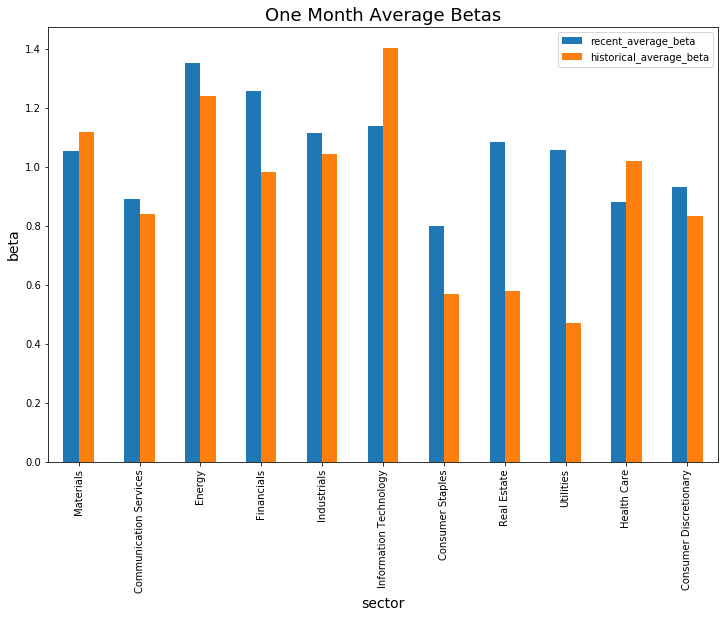

In [101]:
plot_average_betas(one_month, 'One Month Average Betas')

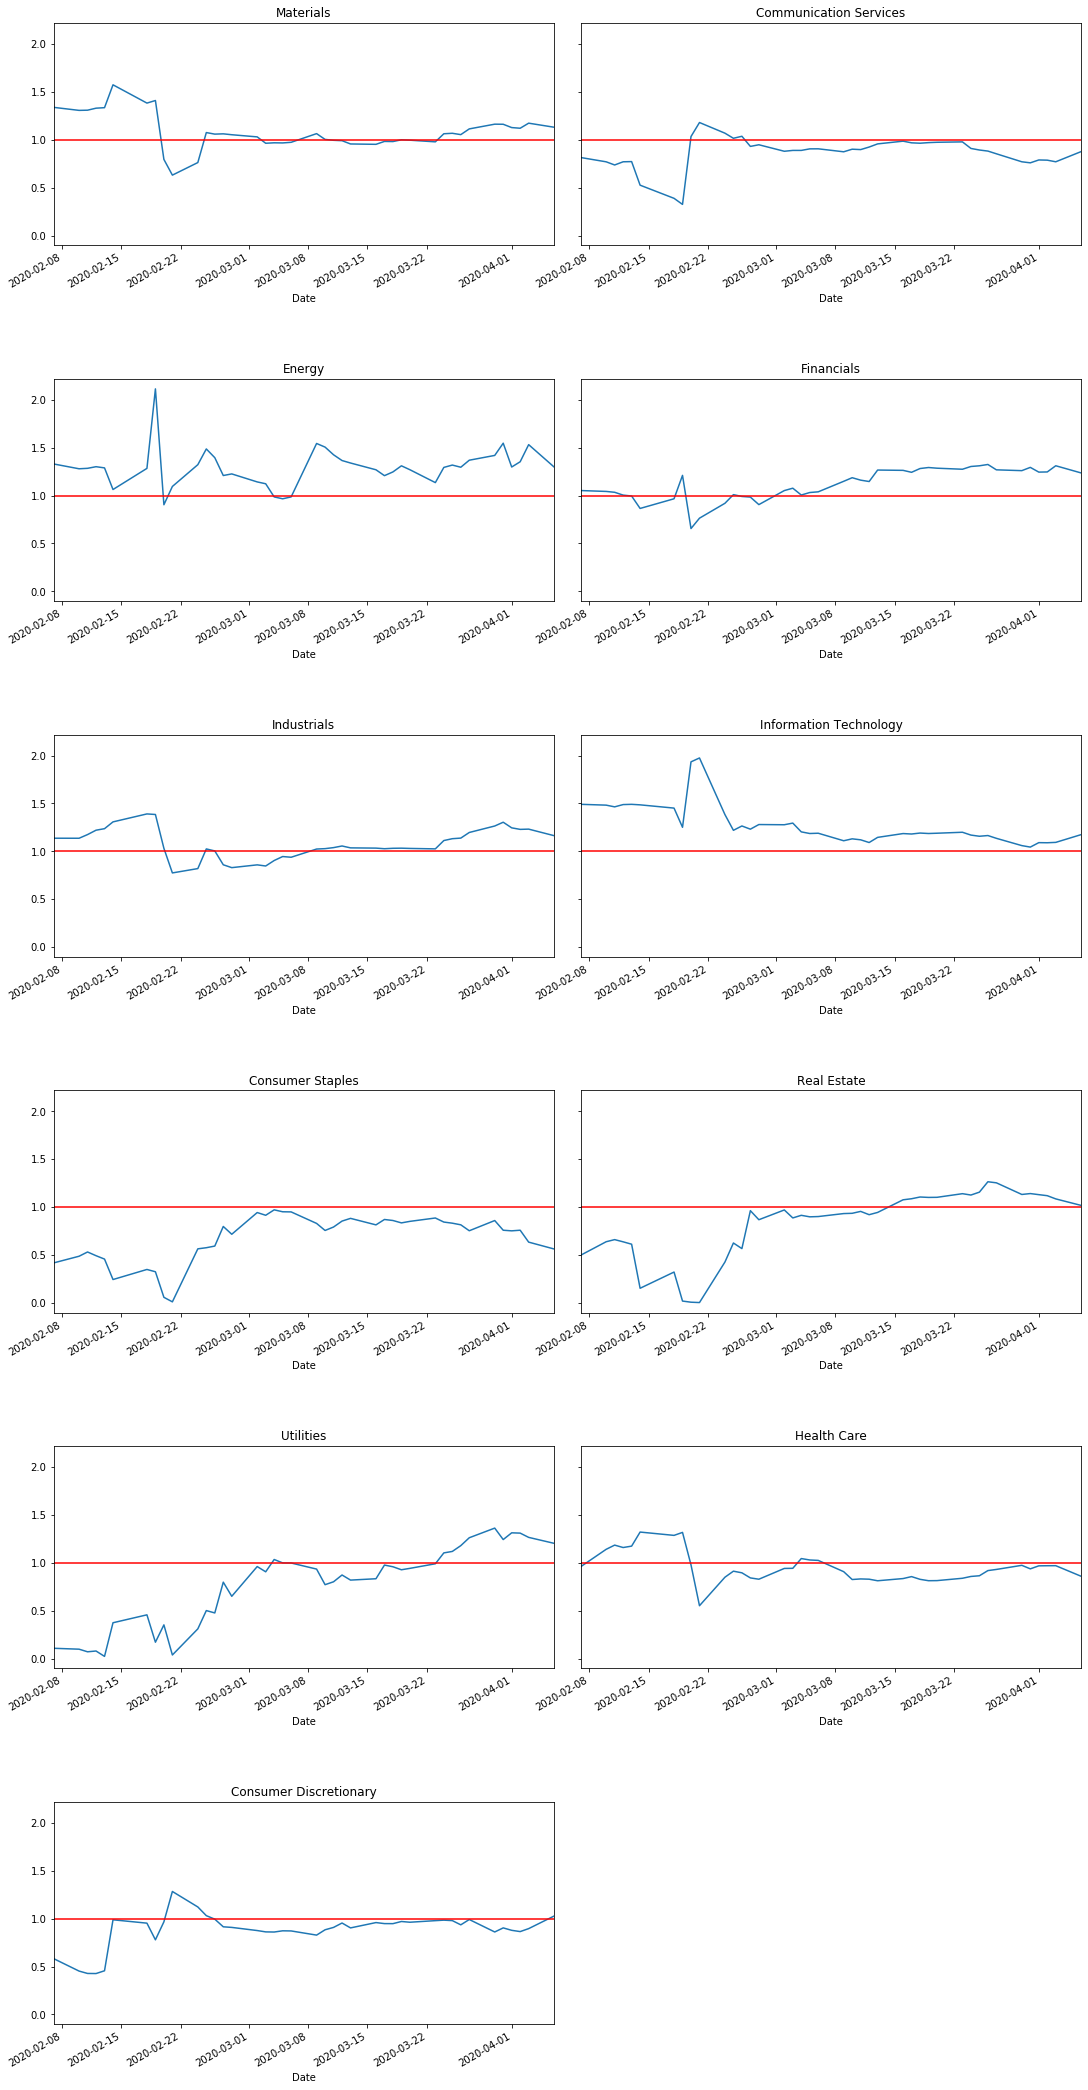

In [69]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2020-02-06', '2020-04-08'), 'one_month_betas.png')

In [44]:
three_months = t_test_for_symbol_betas(betas, '2019-12-06')
three_months.to_clipboard()
three_months

,symbol,sector,p_value,significant?,recent_average_beta,historical_average_beta
0,XLB,Materials,8.502203e-01,False,1.051639,1.060137
1,XLC,Communication Services,5.696901e-02,False,0.890240,0.960454
2,XLE,Energy,1.462807e-03,True,1.350041,1.149153
3,XLF,Financials,1.613145e-04,True,1.255114,1.125255
4,XLI,Industrials,8.680115e-02,False,1.113692,1.057148
5,XLK,Information Technology,7.553459e-17,True,1.138872,1.403319
6,XLP,Consumer Staples,6.232541e-16,True,0.800292,0.435114
7,XLRE,Real Estate,8.153869e-25,True,1.082446,0.462640
8,XLU,Utilities,4.835174e-18,True,1.057504,0.326670
9,XLV,Health Care,5.925178e-01,False,0.878982,0.857725


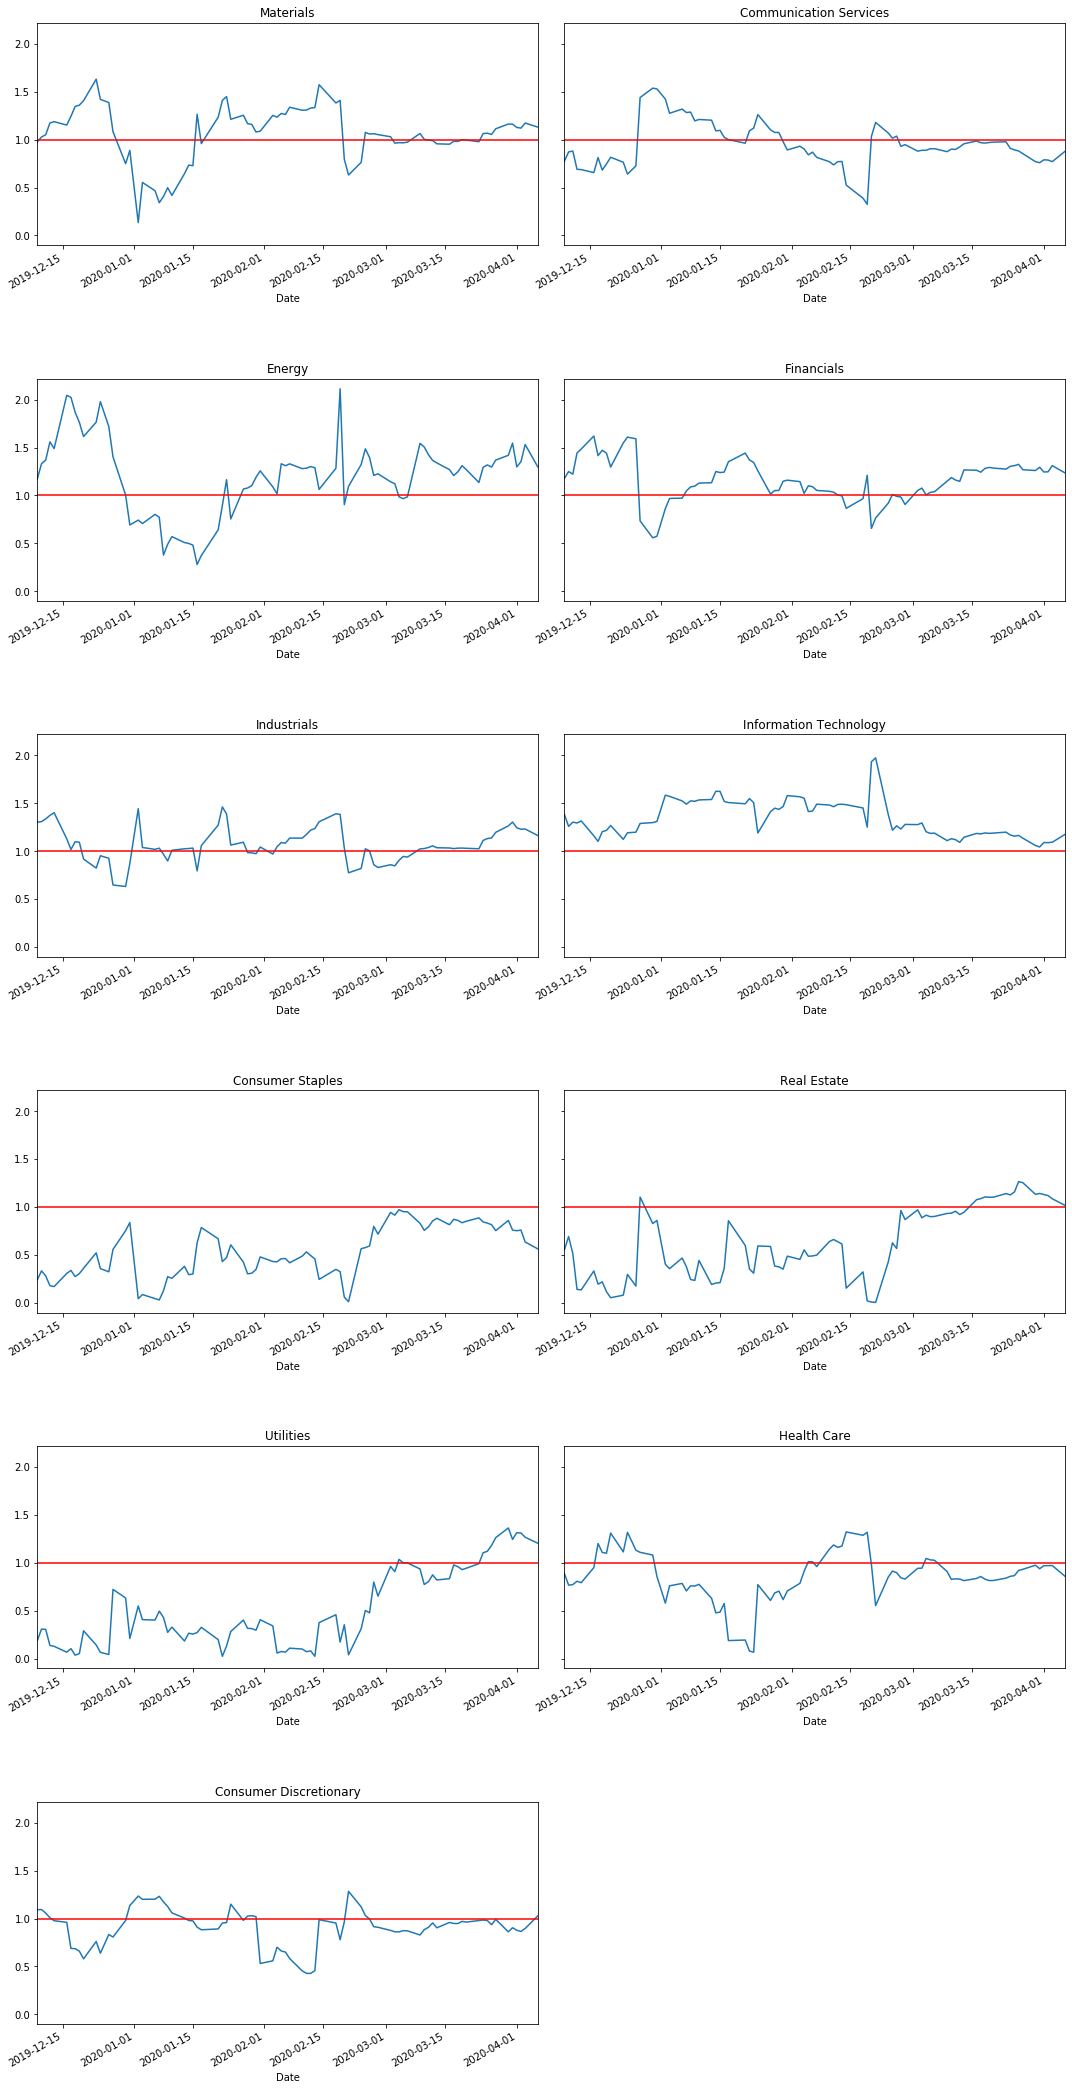

In [70]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2019-12-06', '2020-04-08'), 'three_month_betas.png')

In [45]:
one_year = t_test_for_symbol_betas(betas, '2019-03-06')
one_year.to_clipboard()
one_year

,symbol,sector,p_value,significant?,recent_average_beta,historical_average_beta
0,XLB,Materials,7.351170e-01,False,1.051639,1.043043
1,XLC,Communication Services,1.857039e-09,True,0.890240,1.054304
2,XLE,Energy,9.937719e-10,True,1.350041,1.071418
3,XLF,Financials,9.556726e-14,True,1.255114,1.097799
4,XLI,Industrials,6.931347e-01,False,1.113692,1.124898
5,XLK,Information Technology,1.942111e-20,True,1.138872,1.355792
6,XLP,Consumer Staples,6.948983e-21,True,0.800292,0.472702
7,XLRE,Real Estate,4.071977e-30,True,1.082446,0.499060
8,XLU,Utilities,7.179677e-15,True,1.057504,0.336788
9,XLV,Health Care,4.658928e-01,False,0.878982,0.858282


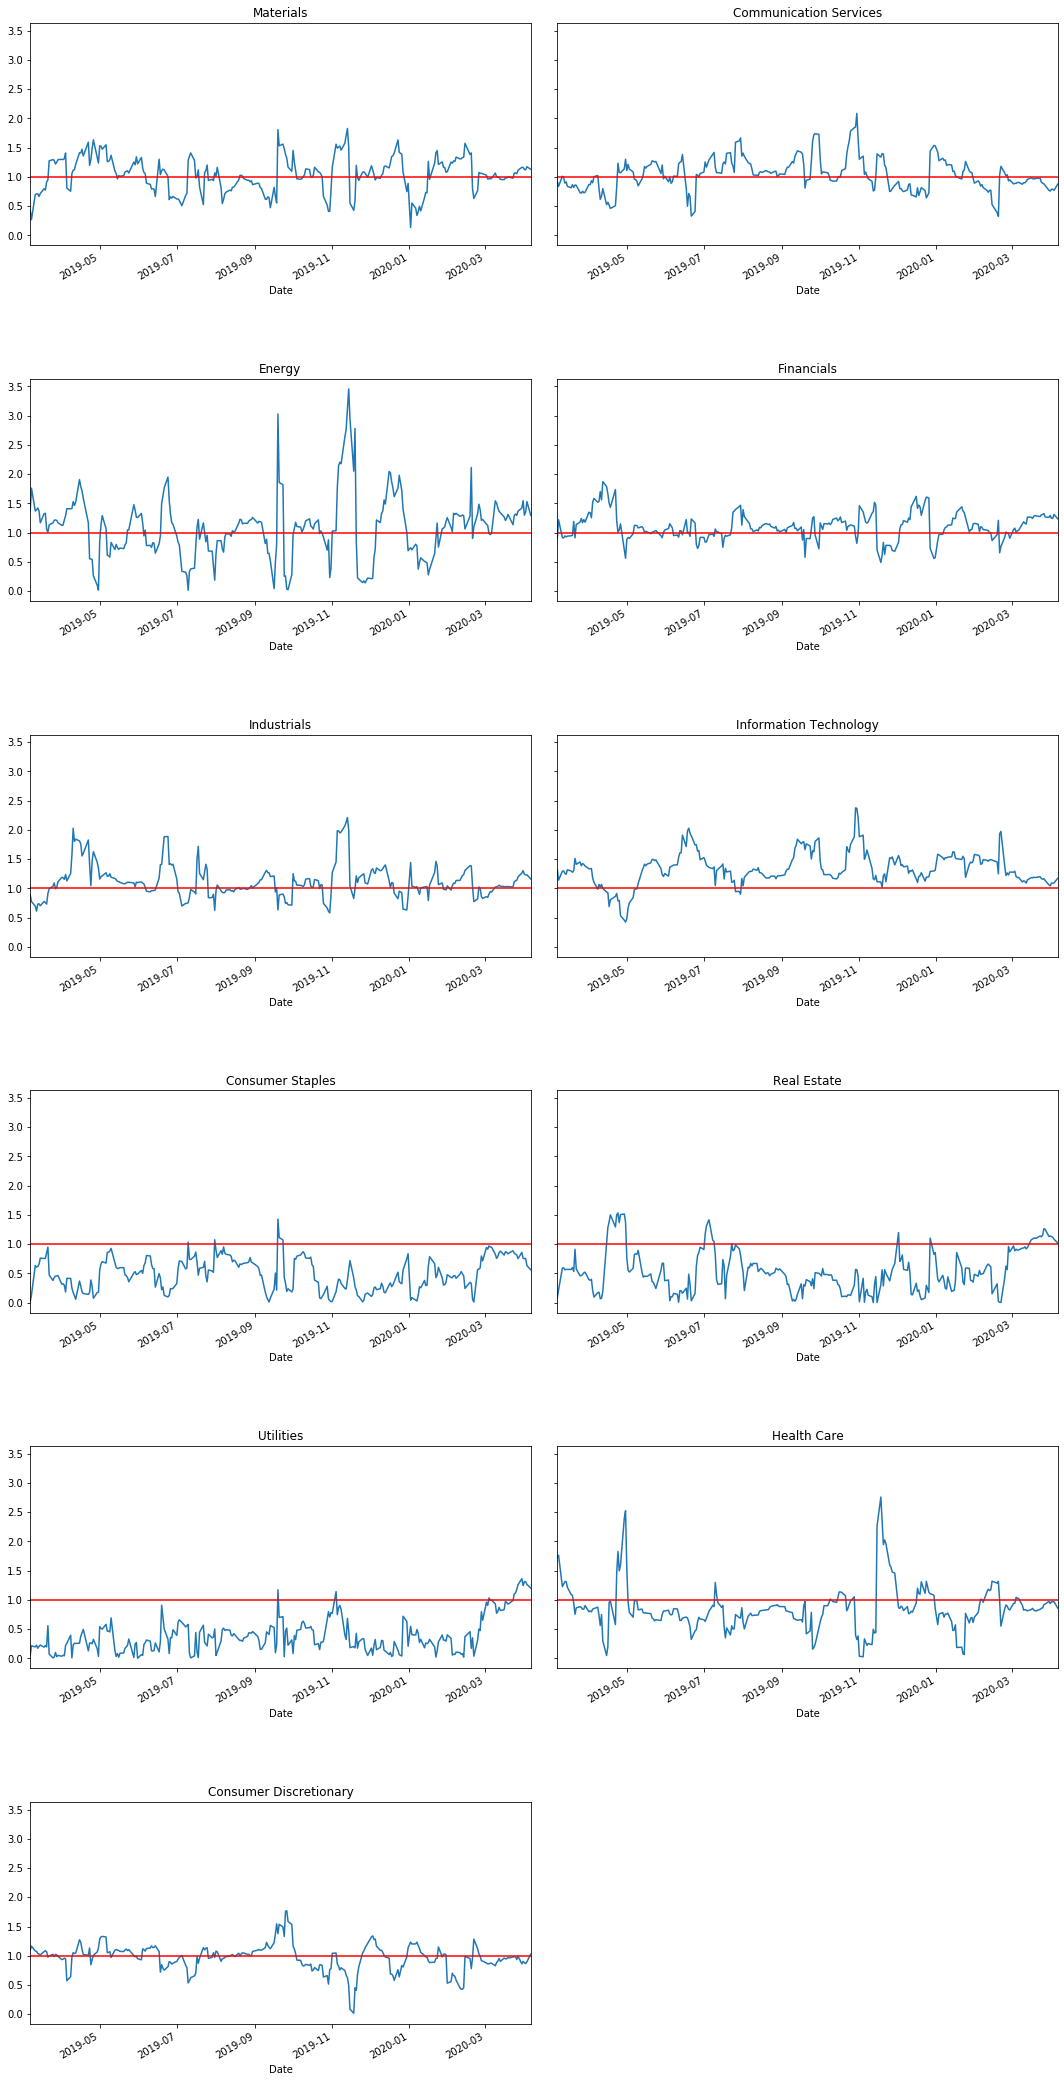

In [71]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2019-03-06', '2020-04-08'), 'one_year_betas.png')

In [46]:
five_year = t_test_for_symbol_betas(betas, '2015-03-06')
five_year.to_clipboard()
five_year

,symbol,sector,p_value,significant?,recent_average_beta,historical_average_beta
0,XLB,Materials,2.290068e-02,False,1.051639,1.097853
1,XLC,Communication Services,1.328464e-15,True,0.890240,1.126784
2,XLE,Energy,1.089217e-12,True,1.350041,1.053410
3,XLF,Financials,2.191175e-22,True,1.255114,1.027422
4,XLI,Industrials,2.136458e-01,False,1.113692,1.081577
5,XLK,Information Technology,1.234083e-26,True,1.138872,1.374609
6,XLP,Consumer Staples,1.051484e-18,True,0.800292,0.488035
7,XLRE,Real Estate,6.742251e-27,True,1.082446,0.475356
8,XLU,Utilities,1.672136e-14,True,1.057504,0.328203
9,XLV,Health Care,8.611077e-01,False,0.878982,0.875095


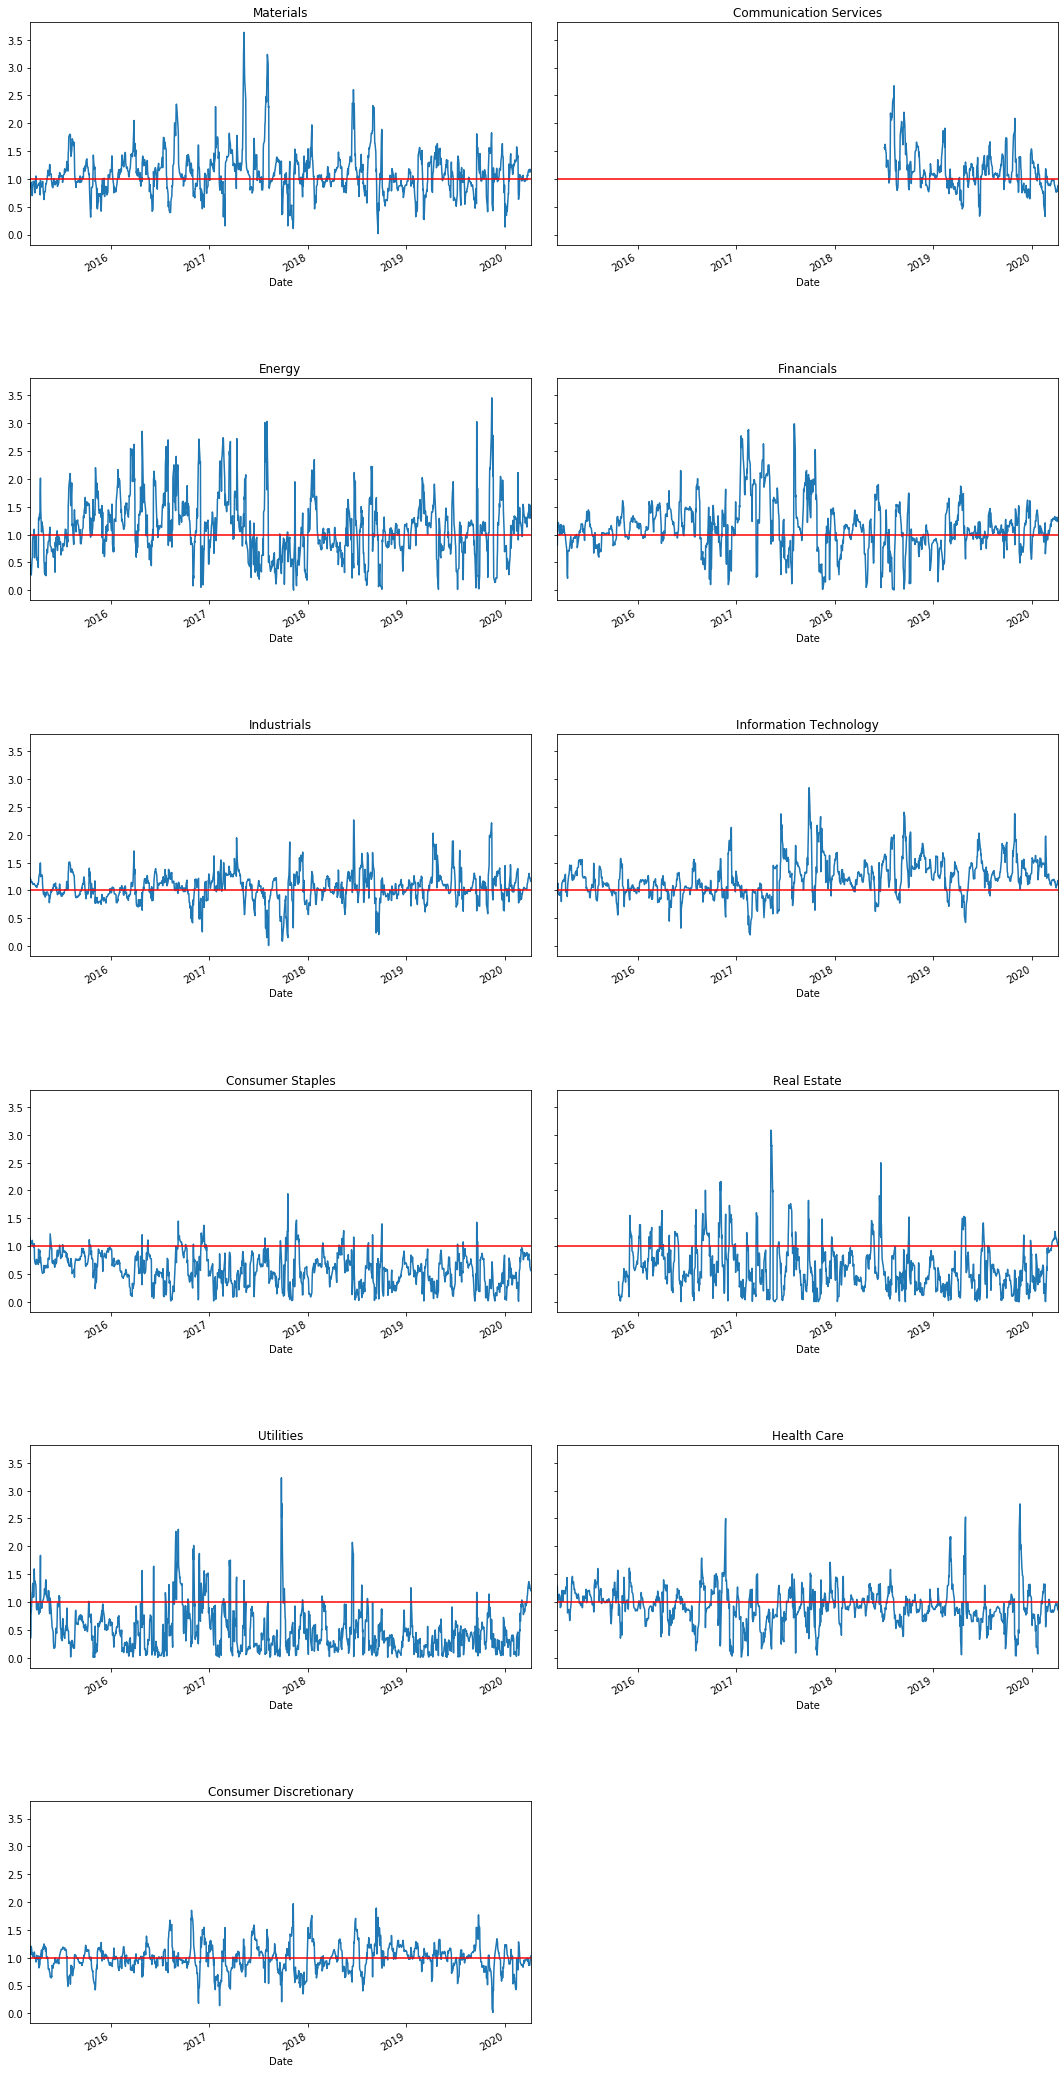

In [73]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2015-03-06', '2020-04-08'), 'five_year_betas.png')